This jupyter page is used to analyse the different between SFOE and Pronovo wind and solar monthly data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(r"/"))
from ecodynelec.preprocessing.enr_residual_utils import *
from ecodynelec.preprocessing.auxiliary import *
from ecodynelec.preprocessing.loading import *
from ecodynelec.parameter import *
from ecodynelec.pipeline_functions import *



Loading all the necessary dataset

In [2]:
needed = [
    'Solar','Wind',
    'Biogas','Biomass_1_crops','Biomass_2_waste',
    'Waste_1','Waste_2.50','Waste_3.100','Waste_4_no_enr',
    'Sewage_gas',
]

pronovo_data=load_all_pronovo_files(r'/support_files/pronovo_data', types=needed)
SFOE_data=pd.read_excel(r"C:\Users\PC Jules\Desktop\Update 2024\data\SFOE_solar_wind.xlsx")
EC_data=read_enr_data_from_energy_charts(r'/support_files', verbose=False)

cfg_path = r"C:\Users\PC Jules\Desktop\EcoDynElec\update_2024\Spreadsheet_2024.xlsx"
neighbours = ["FR", "DE", "IT", "AT"]
sg_data = None
enr_prod_ch = None
is_verbose = True
progress_bar = True
p = load_config(cfg_path)
entsoe_data=import_data(ctry=p.ctry, start=p.start, end=p.end, freq=p.freq, involved_countries=neighbours,
                                path_gap=p.path.gap, sg_data=sg_data, enr_prod_ch=enr_prod_ch,
                                path_gen=p.path.generation, path_imp=p.path.exchanges,
                                savedir=p.path.savedir, net_exchange=p.net_exchanges,
                                residual_global=p.residual_global, correct_imp=p.sg_imports,
                                clean_data=p.data_cleaning, is_verbose=is_verbose, progress_bar=progress_bar)

RuntimeError: Aucun CSV exploitable trouvé sous /support_files/pronovo_data

SOLAR DATA

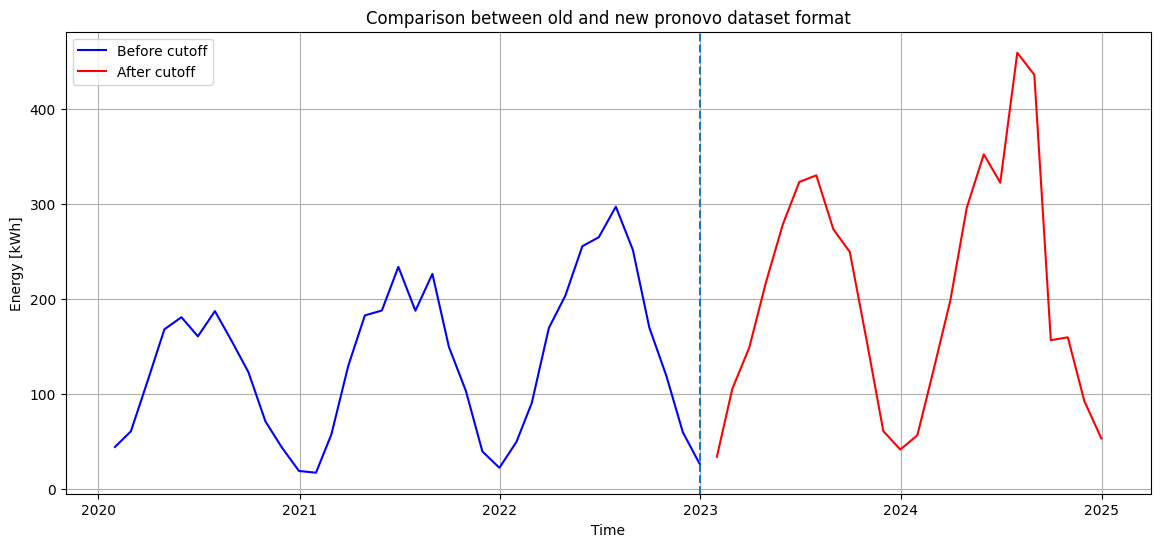

In [33]:
s = pronovo_data['Solar']

cutoff = pd.Timestamp('2023-01-01')

left  = s[s.index <  cutoff]
right = s[s.index >= cutoff]

plt.figure(figsize=(14,6))
plt.plot(left.index,  left.values,  label='Before cutoff', color='blue')
plt.plot(right.index, right.values, label='After cutoff', color='red')
plt.axvline(cutoff, ls='--')  # ligne verticale à la date
plt.title("Comparison between old and new pronovo dataset format")
plt.xlabel("Time")
plt.ylabel("Energy [kWh]")
plt.legend(); plt.grid(True)
plt.show()

WIND DATA

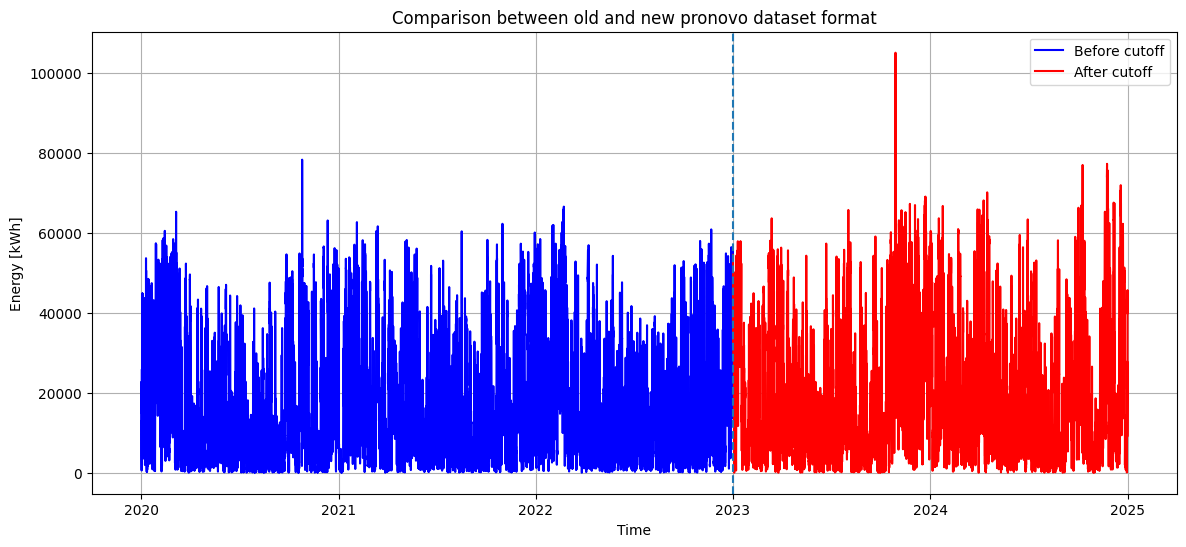

In [4]:
w = pronovo_data['Wind']

cutoff = pd.Timestamp('2023-01-01')

left  = w[w.index <  cutoff]
right = w[w.index >= cutoff]

plt.figure(figsize=(14,6))
plt.plot(left.index,  left.values,  label='Before cutoff', color='blue')
plt.plot(right.index, right.values, label='After cutoff', color='red')
plt.axvline(cutoff, ls='--')  # ligne verticale à la date
plt.title("Comparison between old and new pronovo dataset format")
plt.xlabel("Time")
plt.ylabel("Energy [kWh]")
plt.legend(); plt.grid(True)
plt.show()

Monthly scaling of Pronovo and Energy Charts data to compare with new SFOE data. Pass from kWh and GWh

In [5]:
pronovo = pronovo_data.copy()
EC = EC_data.copy()
pronovo_data=pronovo.resample('ME').sum()/1e6
EC_data=EC.resample('ME').sum()

Comparison of Pronovo solar and wind data with that of SFOE

SOLAR DATA

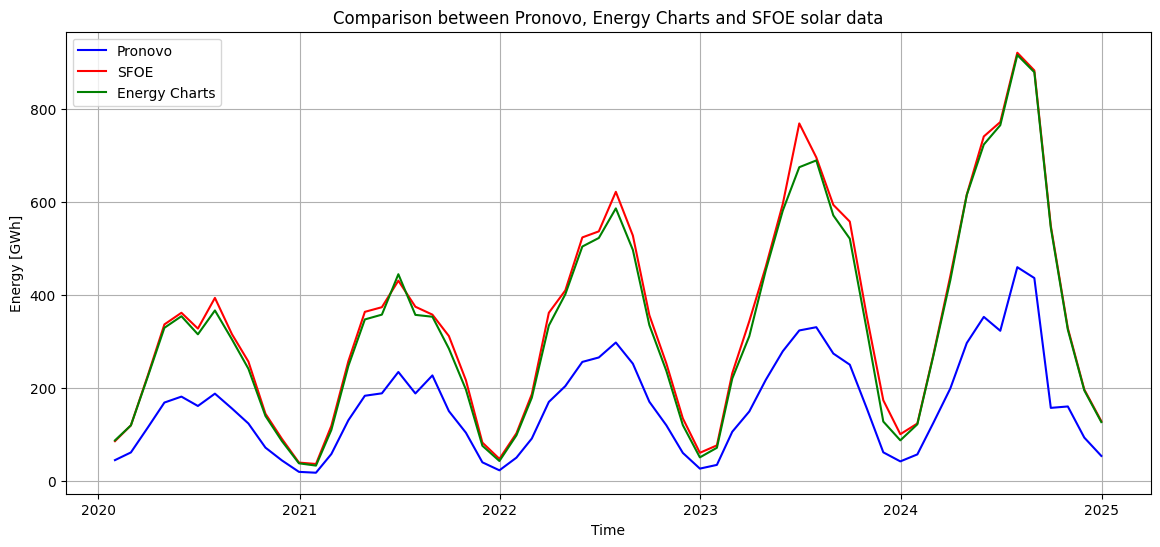

In [6]:
s = pronovo_data['Solar']
S = SFOE_data['Solar']
EC_S = EC_data['Solar']
S.index = s.index
EC_S.index = s.index


plt.figure(figsize=(14,6))
plt.plot(s.index, s, label='Pronovo', color='blue')
plt.plot(S.index, S, label='SFOE', color='red')
plt.plot(EC_S.index, EC_S, label='Energy Charts', color='green')
plt.title("Comparison between Pronovo, Energy Charts and SFOE solar data")
plt.xlabel("Time")
plt.ylabel("Energy [GWh]")
plt.legend(); plt.grid(True)
plt.show()

In [7]:
# Correlation Pronovo SFOE
print('PRONOVO vs SFOE')
corr = s.corr(S)
print("\tGlobal correlation :",round(corr*100,2),"%")

# Overall relative deviation
deviation = 100*(S.sum() - s.sum())/S.sum()
print("\tOverall relative deviation :",round(deviation, 2),"%")

# Correlation Energy Charts SFOE
print('\nENERGY CHARTS vs SFOE')
corr = EC_S.corr(S)
print("\tGlobal correlation :",round(corr*100,2),"%")

# Overall relative deviation
deviation = 100*(S.sum() - EC_S.sum())/S.sum()
print("\tOverall relative deviation :",round(deviation, 2),"%")

# Annual correlation
df = pd.concat([EC_S, S], axis=1, keys=['EC_S','S']).dropna()
corr_dict = {}
print('\tAnnual correlation :')
for year, group in df.groupby(df.index.year):
    corr_dict[year] = group['EC_S'].corr(group['S'])
for year, value in corr_dict.items():
    print(f"\t\t{year} correlation : {value*100:.2f} %")

PRONOVO vs SFOE
	Global correlation : 98.37 %
	Overall relative deviation : 52.75 %

ENERGY CHARTS vs SFOE
	Global correlation : 99.78 %
	Overall relative deviation : 3.88 %
	Annual correlation :
		2020 correlation : 99.90 %
		2021 correlation : 99.73 %
		2022 correlation : 99.93 %
		2023 correlation : 99.48 %
		2024 correlation : 99.99 %


WIND DATA

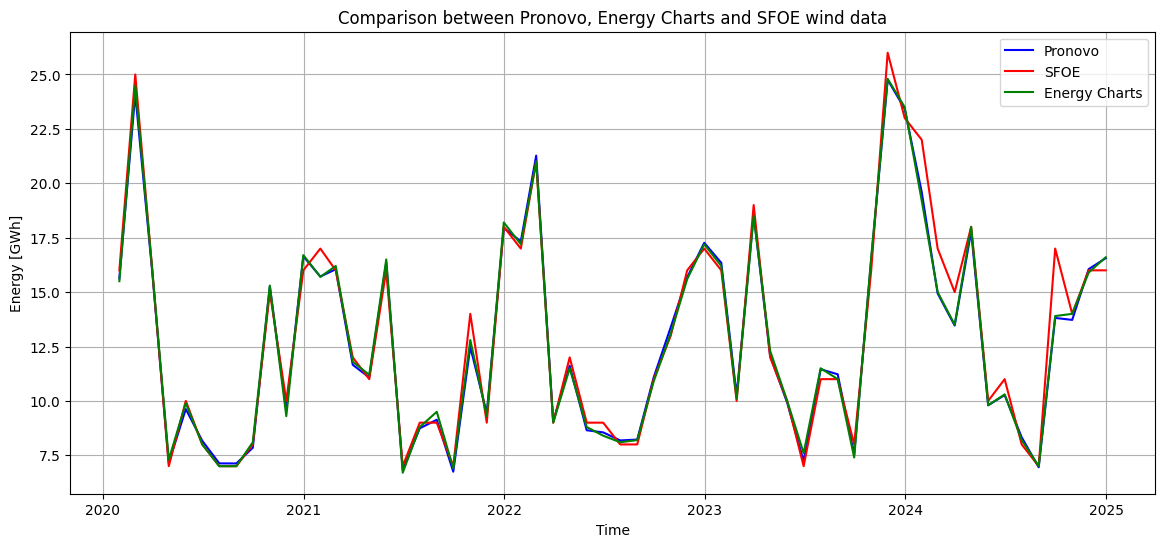

In [8]:
w = pronovo_data['Wind']
W = SFOE_data['Wind']
EC_W = EC_data['Wind']
W.index = w.index
EC_W.index = w.index

plt.figure(figsize=(14,6))
plt.plot(w.index, w, label='Pronovo', color='blue')
plt.plot(W.index, W, label='SFOE', color='red')
plt.plot(EC_W.index, EC_W, label='Energy Charts', color='green')
plt.title("Comparison between Pronovo, Energy Charts and SFOE wind data")
plt.xlabel("Time")
plt.ylabel("Energy [GWh]")
plt.legend(); plt.grid(True)
plt.show()

In [9]:
# Correlation Pronovo SFOE
print('PRONOVO vs SFOE')
corr = w.corr(W)
print("Global correlation :",round(corr*100,2),"%")

# Overall relative deviation
deviation = 100*(W.sum() - w.sum())/W.sum()
print("Overall relative deviation :",round(deviation, 2),"%")

# Correlation Energy Charts SFOE
print('\nENERGY CHARTS vs SFOE')
corr = EC_W.corr(W)
print("\tGlobal correlation :",round(corr*100,2),"%")

# Overall relative deviation
deviation = 100*(W.sum() - EC_W.sum())/W.sum()
print("\tOverall relative deviation :",round(deviation, 2),"%")

# Annual correlation
df = pd.concat([EC_W, W], axis=1, keys=['EC_W','W']).dropna()
corr_dict = {}
print('\tAnnual correlation :')
for year, group in df.groupby(df.index.year):
    corr_dict[year] = group['EC_W'].corr(group['W'])
for year, value in corr_dict.items():
    print(f"\t\t{year} correlation : {value*100:.2f} %")


PRONOVO vs SFOE
Global correlation : 98.9 %
Overall relative deviation : 1.64 %

ENERGY CHARTS vs SFOE
	Global correlation : 98.86 %
	Overall relative deviation : 1.53 %
	Annual correlation :
		2020 correlation : 99.76 %
		2021 correlation : 98.89 %
		2022 correlation : 99.80 %
		2023 correlation : 99.61 %
		2024 correlation : 96.43 %


CORRELATION TEST BETWEEN PRONOVO DATA BEFORE AND AFTER FITTING WITH ENTSO-E DATA

In [10]:
# Data standardization
#Before fitting
pronovo_nofit = pronovo.loc["2020-01-26", "Solar"]
pronovo_nofit_stand = pronovo_nofit / pronovo_nofit.max()

#Fitting
pronovo_fit = reorganize_enr_data(pronovo,EC)
pronovo_fit = pronovo_fit.loc["2020-01-26", "Solar"]
pronovo_fit_stand = pronovo_fit / pronovo_fit.max()

# ENTSO-E standardization
entsoe_stand = entsoe_data.loc["2020-01-26", "Solar_CH"]
entsoe_stand = entsoe_stand / entsoe_stand.max()

C:\Users\PC Jules\Desktop\EcoDynElec\ecodynelec\preprocessing\enr_residual_utils.py:416: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  adjusted_dates = pd.date_range(start=factors.index[0],


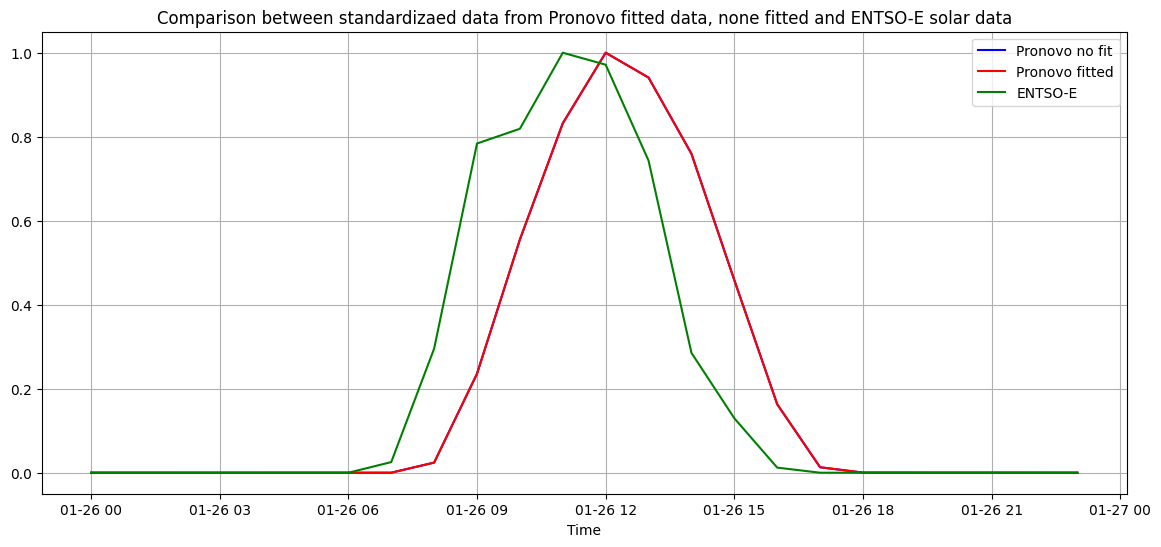

In [11]:
plt.figure(figsize=(14,6))
plt.plot(pronovo_nofit.index, pronovo_nofit_stand, label='Pronovo no fit', color='blue')
plt.plot(pronovo_fit.index, pronovo_fit_stand, label='Pronovo fitted', color='red')
plt.plot(entsoe_stand.index, entsoe_stand, label='ENTSO-E', color='green')
plt.title("Comparison between standardizaed data from Pronovo fitted data, none fitted and ENTSO-E solar data")
plt.xlabel("Time")
plt.legend(); plt.grid(True)
plt.show()

In [12]:
# Correlation Pronovo without fitting vs Pronovo fitted
print('PRONOVO NO FIT vs FITTED PRONOVO')
corr = pronovo_nofit_stand.corr(pronovo_fit_stand)
print("\tGlobal correlation :",round(corr*100,2),"%")

# Correlation Pronovo without fitting vs ENTSO-E
print('\nPRONOVO NO FIT vs ENTSO-E')
corr = pronovo_nofit_stand.corr(entsoe_stand)
print("\tGlobal correlation :",round(corr*100,2),"%")

# Correlation Pronovo fitted vs ENTSO-E
print('\nFITTED PRONOVO vs ENTSO-E')
corr = pronovo_fit_stand.corr(entsoe_stand)
print("\tGlobal correlation :",round(corr*100,2),"%")

PRONOVO NO FIT vs FITTED PRONOVO
	Global correlation : 100.0 %

PRONOVO NO FIT vs ENTSO-E
	Global correlation : 84.59 %

FITTED PRONOVO vs ENTSO-E
	Global correlation : 84.59 %


In [38]:
pronovo_data.index = pd.to_datetime(pronovo_data.index)
sum={}
for c in pronovo_data.columns:
    sum[c] = pronovo_data[pronovo_data.index.year == 2023][c].sum()
sum

{'Solar': np.float64(2216.93848437285),
 'Wind': np.float64(169.28094353),
 'Biogas': np.float64(329.957510992),
 'Biomass_1_crops': np.float64(0.0),
 'Biomass_2_waste': np.float64(137.143540496),
 'Waste_1': np.float64(387.518496878),
 'Sewage_gas': np.float64(98.97932035699996),
 'Waste_4_no_enr': np.float64(632.7151642225001)}

In [39]:
EC_data.index = pd.to_datetime(EC_data.index)
sum={}
for c in EC_data.columns:
    sum[c] = EC_data[EC_data.index.year == 2023][c].sum()
sum

{'Hydraulique': np.float64(0.0),
 'Biogas': np.float64(330.70000000000005),
 'Biomass_all': np.float64(0.0),
 'Sewage_gas': np.float64(98.2),
 'Biomass_1_crops': np.float64(0.0),
 'Biomass_2_waste': np.float64(137.0),
 'Waste_1': np.float64(1653.0000000000002),
 'Wind': np.float64(169.5),
 'Solar': np.float64(4624.7),
 'Eaux usées': np.float64(4.7),
 'Eau de drainage': np.float64(8127.099999999999),
 'Débits résiduels (barrages)': np.float64(249.2),
 "Hydraulique fil de l'eau": np.float64(6446.1),
 'Pompage-turbinage production': np.float64(11014.7),
 'Eau de Stockage': np.float64(8961.1),
 'Eau potable': np.float64(254.39999999999998),
 'Turbine à vapeur de gaz fossile': np.float64(63.8),
 'Centrale combinée à gaz et à vapeur': np.float64(42.3),
 'Turbine à gaz': np.float64(20.200000000000003),
 'Moteur à combustion': np.float64(17.4),
 'Energie du bois': np.float64(395.4),
 'Énergies fossiles gazeuses': np.float64(71.2),
 'Énergies fossiles liquides': np.float64(4.7)}

In [53]:
# Recharger le CSV en spécifiant la colonne de date comme index
Swissgrid = pd.read_csv(
    r"/ecodynelec/data/SwissGrid_total.csv",
    index_col=0,  # Supposant que la première colonne contient les dates
    parse_dates=True  # Parser automatiquement les dates
)
sum={}
for c in Swissgrid.columns:
    sum[c] = Swissgrid.loc['2023-01-01':'2023-12-31',c].sum()
sum



{'Consommation_CH': np.int64(53478428672),
 'Production_CH': np.int64(67960445547),
 'Consommation_Brut_CH': np.int64(62081581164),
 'CH->AT': np.int64(1212363682),
 'AT->CH': np.int64(5108701906),
 'CH->DE': np.int64(7013826494),
 'DE->CH': np.int64(10820390709),
 'CH->FR': np.int64(3460309323),
 'FR->CH': np.int64(10108176245),
 'CH->IT': np.int64(21201286437),
 'IT->CH': np.int64(979749717)}

In [56]:
sum={}
for c in entsoe_data.columns:
    sum[c] = entsoe_data.loc['2023-01-01':'2023-12-31',c].sum()
sum

{'Biomass_CH': np.float32(0.0),
 'Fossil_Brown_coal/Lignite_CH': np.float32(0.0),
 'Fossil_Coal-derived_gas_CH': np.float32(0.0),
 'Fossil_Gas_CH': np.float32(0.0),
 'Fossil_Hard_coal_CH': np.float32(0.0),
 'Fossil_Oil_CH': np.float32(0.0),
 'Fossil_Oil_shale_CH': np.float32(0.0),
 'Fossil_Peat_CH': np.float32(0.0),
 'Geothermal_CH': np.float32(0.0),
 'Hydro_Pumped_Storage_CH': np.float32(6.942931e+06),
 'Hydro_Run-of-river_and_poundage_CH': np.float32(2.1305202e+06),
 'Hydro_Water_Reservoir_CH': np.float32(1.0961868e+07),
 'Marine_CH': np.float32(0.0),
 'Nuclear_CH': np.float32(2.376452e+07),
 'Other_fossil_CH': np.float32(0.0),
 'Other_renewable_CH': np.float32(0.0),
 'Solar_CH': np.float32(3.538205e+06),
 'Waste_CH': np.float32(0.0),
 'Wind_Offshore_CH': np.float32(0.0),
 'Wind_Onshore_CH': np.float32(168001.56),
 'Mix_Other_CH': np.float32(2.3293054e+07)}